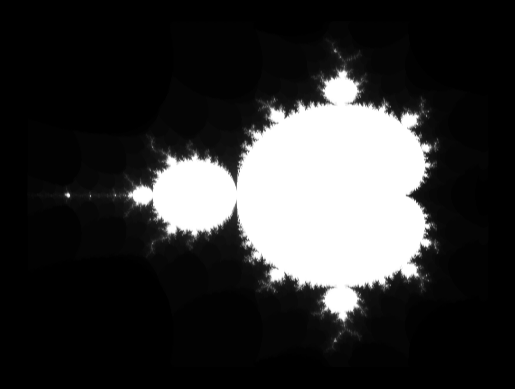

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
max_iters=100


def mandelbrot(c, iters=max_iters):
    z = 0
    zn1 = lambda z : z**2 + c
    for i in range(iters):
        if np.abs(z.real) <= 2:
            z = zn1(z)
        else:
            return i
    return iters


# n_points = 500
def plot_mandelbrot(n_points, dpi=100):
    x = np.linspace(-2, 0.7, n_points)
    y = np.linspace(-1.2, 1.2, n_points)
    mtx = np.zeros([len(x), len(y)], dtype="complex")
    for i in range(len(x)):
        for j in range(len(y)):
            mtx[i][j] = complex(x[i], y[j])
    result = np.apply_along_axis(lambda x: [mandelbrot(i) for i in x], 0, mtx)
    with plt.style.context("dark_background"):
        fig, ax = plt.subplots()
        plt.rcParams['figure.dpi'] = dpi
        ax.scatter(mtx.real, mtx.imag, c=result, cmap="binary_r")
        ax.axis('off')
        plt.show()
plot_mandelbrot(500, dpi=300)

6.112419041999601
418.67917316700004


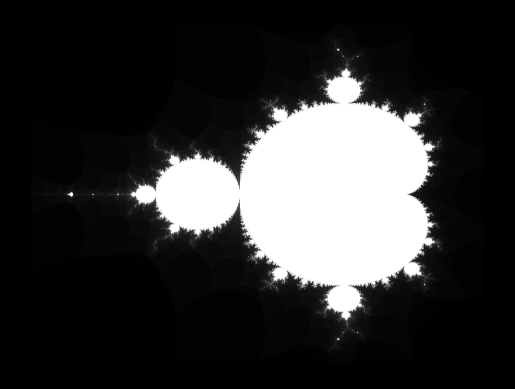

In [4]:
from timeit import default_timer


def plot_mandelbrot(n_points, dpi=100):
    t0 = default_timer()
    x = np.linspace(-2, 0.7, n_points)
    y = np.linspace(-1.2, 1.2, n_points)
    mtx = np.zeros([len(x), len(y)], dtype="complex")
    for i in range(len(x)):
        for j in range(len(y)):
            mtx[i][j] = complex(x[i], y[j])
    print(default_timer() - t0)
    result = np.apply_along_axis(lambda x: [mandelbrot(i) for i in x], 0, mtx)
    print(default_timer() - t0)
    with plt.style.context("dark_background"):
        fig, ax = plt.subplots()
        plt.rcParams['figure.dpi'] = dpi
        ax.scatter(mtx.real, mtx.imag, c=result, cmap="binary_r", s=1)
        ax.axis('off')
        plt.show()
    return mtx, result
mtx, result = plot_mandelbrot(5000, dpi=300)

In [30]:
# import plotly.express as px
# fig = px.imshow(result, color_continuous_scale="rainbow")
# fig.show()
# # plt.show()

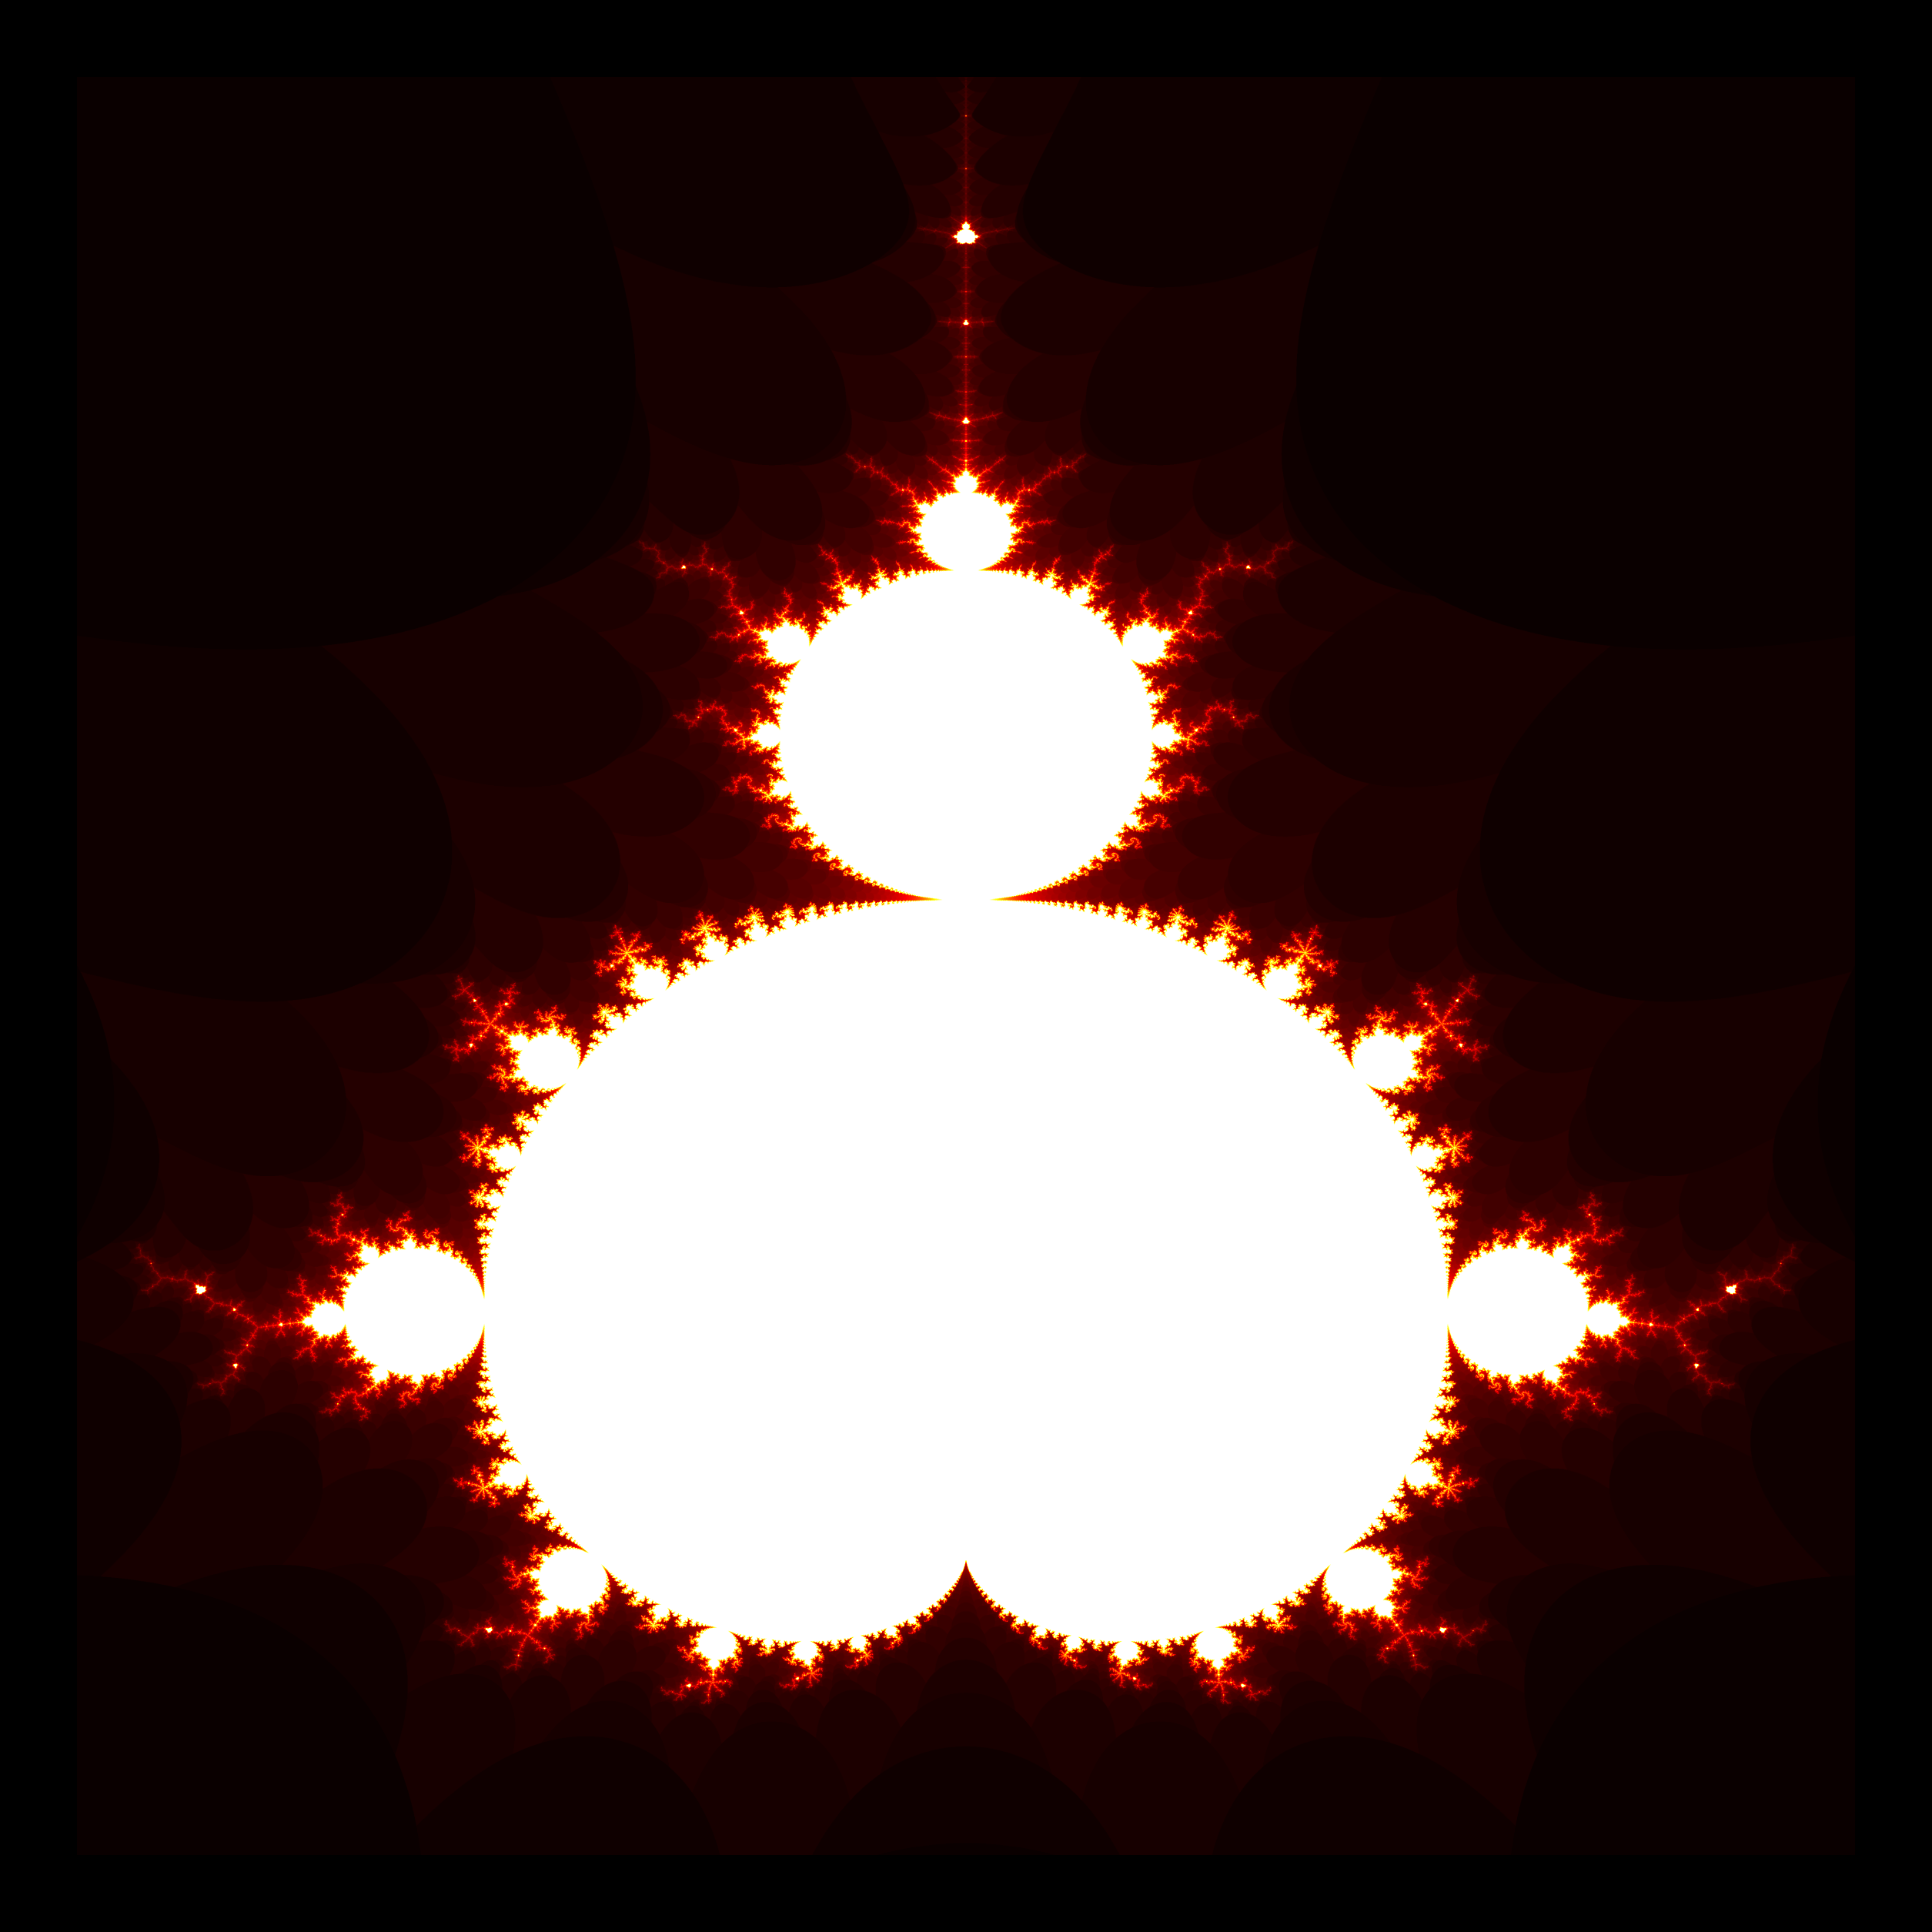

In [31]:
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(3,3), dpi=1000)
    # ax.set_axis_off()
    # fig.add_axes(ax)
    ax.imshow(result, cmap="twilight_shifted")
    ax.imshow(result, cmap="hot")
    ax.axis('off')
    plt.show()